<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Fuel-Cell-EV-Voltage-Prediction/blob/main/BTP_FCEV_Voltage_Prediction_Cycle1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 41.2 MB/s 


In [5]:
data = pd.read_csv('/content/Cycle1 Data BTP - data_cycle1.csv')

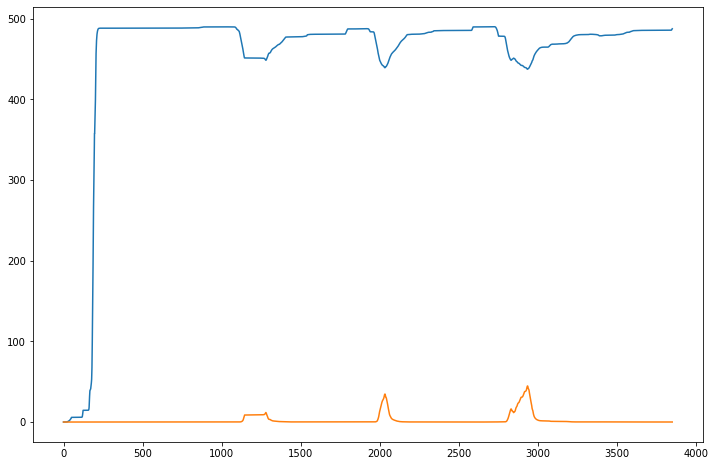

In [6]:
plt.figure(figsize=(12,8))
plt.plot(data['Voltage'])
plt.plot(data['Current'])
plt.show()

In [7]:
data

,Time,Voltage,Current
0,5.310000e-30,2.600000e-24,3.950000e-33
1,1.960000e-10,9.600000e-05,1.460000e-13
2,5.310000e-10,2.598223e-04,7.910000e-13
3,1.520000e-09,7.428029e-04,5.570000e-12
4,2.750000e-09,1.346306e-03,1.400000e-11
...,...,...,...
3848,1.898963e+02,4.862892e+02,4.967715e-02
3849,1.908401e+02,4.865691e+02,4.754265e-02
3850,1.926241e+02,4.870674e+02,4.397638e-02
3851,1.944082e+02,4.875293e+02,4.092181e-02


In [8]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [9]:
data = data.drop('Time',axis=1)
X = data.drop("Voltage",axis=1)
y=data['Voltage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
data

,Voltage,Current
0,2.600000e-24,3.950000e-33
1,9.600000e-05,1.460000e-13
2,2.598223e-04,7.910000e-13
3,7.428029e-04,5.570000e-12
4,1.346306e-03,1.400000e-11
...,...,...
3848,4.862892e+02,4.967715e-02
3849,4.865691e+02,4.754265e-02
3850,4.870674e+02,4.397638e-02
3851,4.875293e+02,4.092181e-02


In [11]:
models = []
models_mae = []
models_mse = []
models_rmse = []
models_r_squared = []

In [12]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
models.append('Linear Regression')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 46.37239160858344
MSE: 11168.850696315189
RMSE: 105.68278334863815
R2 Score: -0.0003904076252208011


In [13]:
#SVM
svr = SVR(C=10)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('SVR')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 28.74763250264518
MSE: 12065.475476045453
RMSE: 109.84295824514857
R2 Score: -0.08070080421572778


In [14]:
#Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('Random Forest')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 2.7851771228532938
MSE: 498.17433626112654
RMSE: 22.319819359957343
R2 Score: 0.955378683011215


In [15]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('XGBRegressor')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

[17:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 2.807090734759598
MSE: 425.7112932905989
RMSE: 20.632772312285105
R2 Score: 0.9618691747427381


In [16]:
import keras_tuner
from tensorflow import keras

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

tuner.search(X_train, y_train, epochs=500, validation_split=0.2)
best_model = tuner.get_best_models()[0]

predictions = best_model.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('ANN')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)



Trial 7 Complete [00h 03m 23s]
val_loss: 434.16094970703125

Best val_loss So Far: 383.0333251953125
Total elapsed time: 00h 27m 51s
31/31 [==============================] - 0s 2ms/step
MAE: 3.8317404419094694
MSE: 392.32807896038685
RMSE: 19.80727338530942
R2 Score: 0.9648592986417583


In [29]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               400       
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 121,201
Trainable params: 121,201
Non-trainable params: 0
_________________________________________________________________


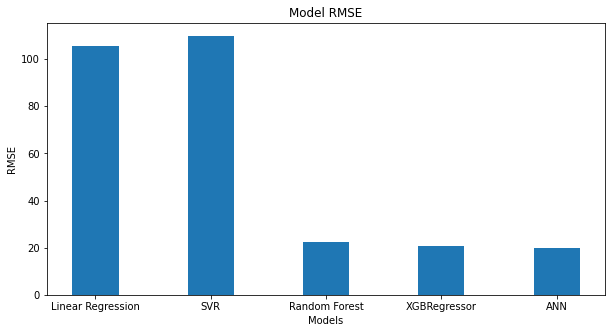

In [17]:
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_rmse,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model RMSE")
plt.show()

In [24]:
for i in range (0, 5):
  print('The RMSE for '+models[i]+' is '+ str(models_rmse[i]))
  print('\n')

The RMSE for Linear Regression is 105.68278334863815


The RMSE for SVR is 109.84295824514857


The RMSE for Random Forest is 22.319819359957343


The RMSE for XGBRegressor is 20.632772312285105


The RMSE for ANN is 19.80727338530942




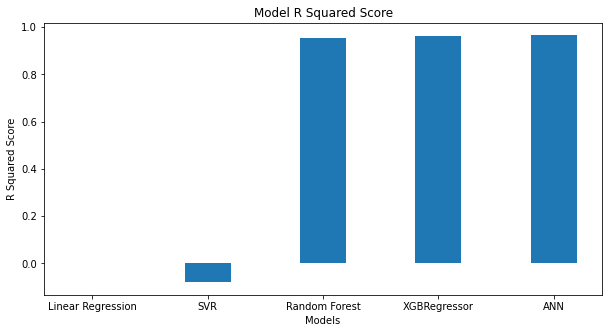

In [19]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_r_squared,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("R Squared Score")
plt.title("Model R Squared Score")
plt.show()

In [26]:
for i in range (0, 5):
  print('The R-Squared Score for '+models[i]+' is '+ str(models_r_squared[i]))
  print('\n')


The R-Squared Score for Linear Regression is -0.0003904076252208011


The R-Squared Score for SVR is -0.08070080421572778


The R-Squared Score for Random Forest is 0.955378683011215


The R-Squared Score for XGBRegressor is 0.9618691747427381


The R-Squared Score for ANN is 0.9648592986417583


